# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
stateInfo = pd.read_csv("../data/states_edu.csv")
stateInfo.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [3]:
numOfYears = stateInfo["YEAR"].unique()
print("There are", len(numOfYears), "years of data logged in the dataset.")

There are 33 years of data logged in the dataset.


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [4]:
michVsOhio = stateInfo.query("STATE == 'MICHIGAN' | STATE == 'OHIO'") #Gets rid of all rows except ones with state of MI or OH
groupByScore = michVsOhio.groupby("STATE")
groupByScore["AVG_MATH_8_SCORE"].mean().sort_values()


STATE
MICHIGAN    276.166667
OHIO        282.250000
Name: AVG_MATH_8_SCORE, dtype: float64

Find the average for your outcome score across all states in 2019

In [5]:
allStates = stateInfo.query("YEAR == '2019'")
allStates = stateInfo.groupby("STATE")
allStates["AVG_MATH_8_SCORE"].mean().sort_values()

STATE
DISTRICT_OF_COLUMBIA    251.166667
ALABAMA                 264.166667
MISSISSIPPI             264.454545
LOUISIANA               265.500000
NEW_MEXICO              266.250000
WEST_VIRGINIA           268.666667
CALIFORNIA              269.166667
HAWAII                  269.583333
ARKANSAS                269.750000
TENNESSEE               272.545455
NEVADA                  272.800000
GEORGIA                 272.833333
OKLAHOMA                273.000000
FLORIDA                 273.454545
KENTUCKY                274.333333
RHODE_ISLAND            274.416667
ARIZONA                 274.666667
SOUTH_CAROLINA          275.818182
MICHIGAN                276.166667
NEW_YORK                277.083333
DELAWARE                277.181818
NATIONAL                277.769231
NORTH_CAROLINA          277.833333
ILLINOIS                278.909091
MARYLAND                278.916667
TEXAS                   279.250000
MISSOURI                279.272727
ALASKA                  280.000000
OREGON        

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [6]:
allStatesMax = stateInfo.groupby("STATE")
allStatesMax["AVG_MATH_8_SCORE"].max().sort_values()

STATE
ALABAMA                 269.0
DISTRICT_OF_COLUMBIA    269.0
LOUISIANA               273.0
NEW_MEXICO              274.0
WEST_VIRGINIA           274.0
MISSISSIPPI             274.0
CALIFORNIA              277.0
NEVADA                  278.0
ARKANSAS                279.0
OKLAHOMA                279.0
TENNESSEE               280.0
MICHIGAN                280.0
HAWAII                  281.0
GEORGIA                 281.0
FLORIDA                 281.0
KENTUCKY                282.0
SOUTH_CAROLINA          282.0
ARIZONA                 283.0
NEW_YORK                283.0
ALASKA                  283.0
RHODE_ISLAND            284.0
DELAWARE                284.0
ILLINOIS                285.0
NATIONAL                285.0
OREGON                  285.0
NORTH_CAROLINA          286.0
MISSOURI                286.0
IOWA                    286.0
UTAH                    287.0
IDAHO                   287.0
INDIANA                 288.0
NEBRASKA                288.0
MARYLAND                288.0
CONN

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [7]:
# Estimate the total enrollment if not already there
stateInfo['ENROLL'] = stateInfo['ENROLL'].fillna(stateInfo['GRADES_ALL_G'])
stateInfo['ENROLL'] = stateInfo['ENROLL'].fillna(stateInfo['GRADES_KG_G'] + stateInfo['GRADES_PK_G'] + stateInfo['GRADES_9_12_G'] + stateInfo['GRADES_9_12_G'] + stateInfo['GRADES_1_8_G'])

# Get rid of empty rows, specifically if they don't have a math 8 score, or stil don't have an enroll
stateInfo.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
stateInfo.dropna(subset=['ENROLL'], inplace=True)
stateInfo.dropna(subset=['TOTAL_REVENUE'], inplace=True)
stateInfo.dropna(subset=['TOTAL_EXPENDITURE'], inplace=True)

# Look at total revenue and expenditure per student
stateInfo['TOTAL_REVENUE_PER_STUDENT'] = stateInfo['TOTAL_REVENUE'] / stateInfo['ENROLL']
stateInfo['TOTAL_EXPENDITURE_PER_STUDENT'] = stateInfo['TOTAL_EXPENDITURE'] / stateInfo['ENROLL']
stateInfo['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = stateInfo['INSTRUCTION_EXPENDITURE'] / stateInfo['ENROLL']

# Create new columns with potentially useful data
from statistics import median
entireMath8ScoreAverage = median(stateInfo['AVG_MATH_8_SCORE'])
revenueMedian = median(stateInfo['TOTAL_REVENUE'])
expenditureMedian = median(stateInfo['TOTAL_EXPENDITURE'])
instructionMedian = median(stateInfo['INSTRUCTION_EXPENDITURE'])
instructionPerStudentMedian = median(stateInfo['INSTRUCTION_EXPENDITURE_PER_STUDENT'])
stateInfo['DISTANCE_FROM_MATH_8_COUNTRY_MEDIAN'] = stateInfo['AVG_MATH_8_SCORE'] - entireMath8ScoreAverage
stateInfo['DISTANCE_FROM_TOTAL_REVENUE_MEDIAN'] = stateInfo['TOTAL_REVENUE'] - revenueMedian
stateInfo['DISTANCE_FROM_TOTAL_EXPENDITURE_MEDIAN'] = stateInfo['TOTAL_EXPENDITURE'] - expenditureMedian
stateInfo['DISTANCE_FROM_INSTRUCTION_EXPENDITURE_MEDIAN'] = stateInfo['INSTRUCTION_EXPENDITURE'] - instructionMedian
stateInfo['DISTANCE_FROM_INSTRUCTION_EXPENDITURE_PER_STUDENT_MEDIAN'] = stateInfo['INSTRUCTION_EXPENDITURE_PER_STUDENT'] - instructionPerStudentMedian

stateInfo.sort_values(by=['AVG_MATH_8_SCORE'], inplace=True)
stateInfo

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_REVENUE_PER_STUDENT,TOTAL_EXPENDITURE_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT,DISTANCE_FROM_MATH_8_COUNTRY_MEDIAN,DISTANCE_FROM_TOTAL_REVENUE_MEDIAN,DISTANCE_FROM_TOTAL_EXPENDITURE_MEDIAN,DISTANCE_FROM_INSTRUCTION_EXPENDITURE_MEDIAN,DISTANCE_FROM_INSTRUCTION_EXPENDITURE_PER_STUDENT_MEDIAN
416,2000_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2000,70762.0,881423.0,184825.0,0.0,696598.0,858807.0,318260.0,...,NaN,NaN,12.456163,12.136556,4.497612,-46.0,-4850896.0,-4938138.0,-2664602.0,-0.861347
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,80937.0,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,188.0,NaN,8.765830,9.178657,4.066867,-46.0,-5022839.0,-5054052.0,-2653702.0,-1.292092
569,2003_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2003,67522.0,1114061.0,152599.0,0.0,961462.0,1105963.0,473414.0,...,188.0,239.0,16.499230,16.379299,7.011256,-38.0,-4618258.0,-4690982.0,-2509448.0,1.652296
671,2005_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,2005,62306.0,1109605.0,167922.0,0.0,941683.0,1085658.0,459063.0,...,191.0,238.0,17.808959,17.424614,7.367878,-36.0,-4622714.0,-4711287.0,-2523799.0,2.008919
24,1992_MISSISSIPPI,MISSISSIPPI,1992,506668.0,1684706.0,277706.0,901199.0,505801.0,1691990.0,956104.0,...,199.0,NaN,3.325069,3.339445,1.887042,-35.0,-4047613.0,-4104955.0,-2026758.0,-3.471917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,2015_MASSACHUSETTS,MASSACHUSETTS,2015,916130.0,16985185.0,778939.0,6808436.0,9397810.0,16972319.0,9774884.0,...,235.0,274.0,18.540147,18.526103,10.669756,16.0,11252866.0,11175374.0,6792022.0,5.310797
786,2007_MASSACHUSETTS,MASSACHUSETTS,2007,945070.0,14407777.0,754202.0,6485380.0,7168195.0,14315518.0,8053653.0,...,236.0,273.0,15.245196,15.147574,8.521753,17.0,8675458.0,8518573.0,5070791.0,3.162794
888,2009_MASSACHUSETTS,MASSACHUSETTS,2009,932437.0,15298022.0,1181681.0,5974489.0,8141852.0,15174814.0,8885949.0,...,234.0,274.0,16.406494,16.274358,9.529812,18.0,9565703.0,9377869.0,5903087.0,4.170852
990,2011_MASSACHUSETTS,MASSACHUSETTS,2011,924903.0,15396681.0,1197383.0,5783240.0,8416058.0,15150898.0,8685894.0,...,237.0,275.0,16.646806,16.381067,9.391140,18.0,9664362.0,9353953.0,5703032.0,4.032181


Feature engineering justification: First, I noticed that there were a lot of row that were missing the "ENROLL" information. However, when I looked at some of the numbers, I noticed that the sum of the other enrollment columns generaly was pretty close to the actual enrollment when looking at complete columns. So, I did that. Then, I removed some rows that had crucial information, like the math 8 score, missing. I then created a lot of extra columns that include some potentially useful information: average expenditure per student, average revenue per student, average instruction expenditure, and how much the average math 8 score deviated from the mean.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Instruction Expenditre per Student vs Average Math 8 Score')

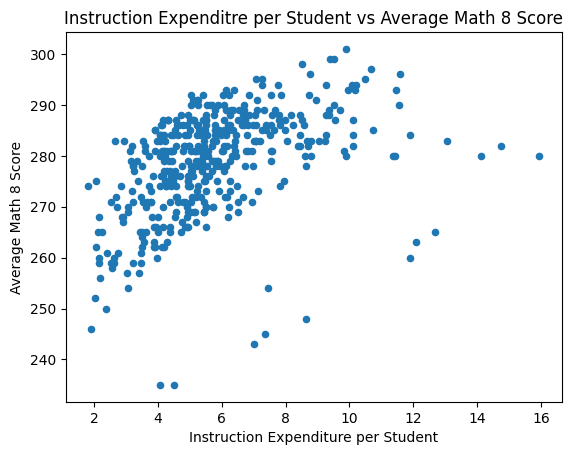

In [8]:
stateInfo.plot.scatter(x= 'INSTRUCTION_EXPENDITURE_PER_STUDENT', y= 'AVG_MATH_8_SCORE')
plt.xlabel('Instruction Expenditure per Student')
plt.ylabel('Average Math 8 Score')
plt.title('Instruction Expenditre per Student vs Average Math 8 Score')

This graph shows an interesting correlation between instruction expenditure per student and the average math 8 score. It seem that as intruction expenditure per student increases, the average math 8 score increases. However, there is a drastic drop-off in this correlation once the expenditure per student reaches 12. However, there are not that many data points there and could be potential outliars for various reasons.

**Visualization 2**

Text(0, 0.5, 'Distance from Math 8 Median Score')

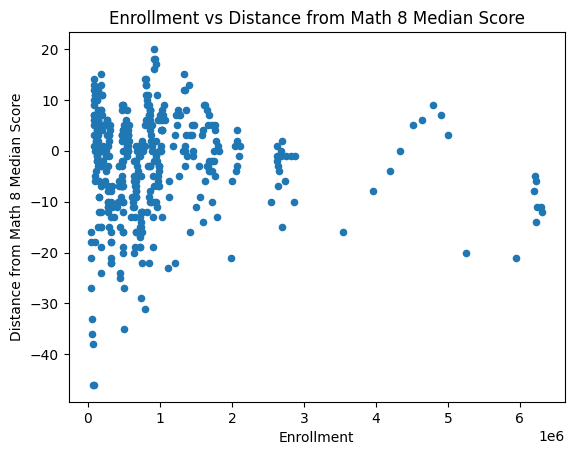

In [9]:
stateInfo.plot.scatter(x= 'ENROLL', y= 'DISTANCE_FROM_MATH_8_COUNTRY_MEDIAN')
plt.title('Enrollment vs Distance from Math 8 Median Score')
plt.xlabel('Enrollment')
plt.ylabel('Distance from Math 8 Median Score')

This graph shows the total enrollment vs the distance from the math 8 median score. It actually shows a very interesting relationship. It makes sense that for extremely large enrollment, the scores tend to not be the highest, as it is hard to have a high-quality education in extremely large schools. However, it also seems that although the smaller enrollments are more condensed towards scores of -10 to +15, the absolute highest scores actually come from enrollments of around 1 million students.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = stateInfo[['INSTRUCTION_EXPENDITURE_PER_STUDENT', 'DISTANCE_FROM_INSTRUCTION_EXPENDITURE_PER_STUDENT_MEDIAN', 'AVG_MATH_4_SCORE', 'TOTAL_EXPENDITURE_PER_STUDENT']].dropna()
y = stateInfo.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.median(), inplace=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [13]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [14]:
# create your model here
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [17]:
print(model.score(X_test, y_test))
print(model.intercept_)
print(model.coef_)
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.8810485047133717
61.768396244636705
[ 0.60981006  0.60981006  0.9439865  -0.81759799]
0.32659185668106583
3.183691582857274
3.9083619430442273


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

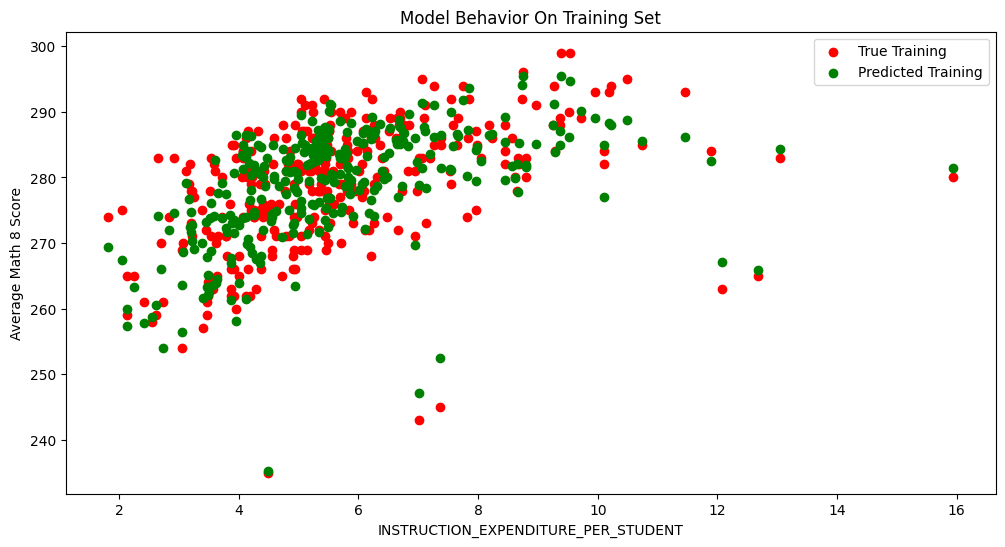

In [18]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

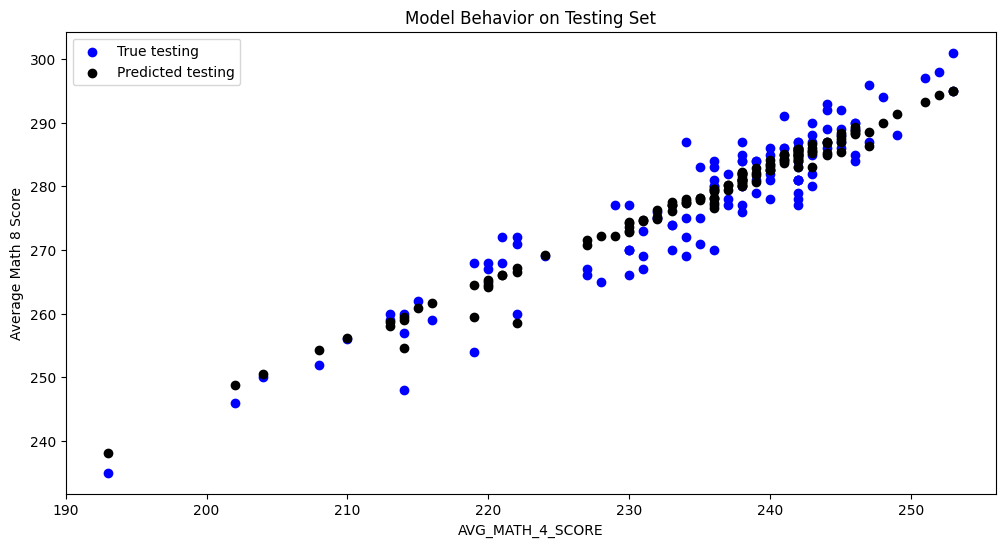

In [19]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math 8 Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

These 2 graphs predicted how instruction expenditure per student and average math 4 score affected average math 8 score. I was actually surprised how well the first model performed. It seemed to me that the set was fairly random, but the model seemed to predict it very accurately, including some of the outliars. I actually though the second model would perform better, but it seems that the second model did not account for a higher deviation in data. Overall, however, both models performed well because of the high correlation coefficient value. 